In [7]:
import pickle
with open("/content/drive/MyDrive/WaterBalance/notebook/ds_array_4.pkl", "rb") as f:
    ds_array_4 = pickle.load(f)

with open("/content/drive/MyDrive/WaterBalance/notebook/Ea_pyet.pkl", "rb") as f:
    Ea_pyet = pickle.load(f)

Ea_pyet
ds_array_4

<xarray.Dataset>
Dimensions:             (time: 1, y: 13, x: 20)
Coordinates:
  * x                   (x) float32 -109.3 -109.2 -109.1 ... -107.5 -107.4
  * y                   (y) float32 44.55 44.45 44.35 ... 43.55 43.45 43.35
  * time                (time) datetime64[ns] 2022-01-31
    spatial_ref         int64 0
Data variables:
    precipitation       (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    runoff              (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    underground_runoff  (time, y, x) float64 nan nan nan nan ... nan nan nan nan
    soilmoisture        (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    sub_soilmoisture    (time, y, x) float32 nan nan nan nan ... nan nan nan nan
    shapefile           (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    history:          Created on 2022-02-05 07:15
    input_data_hash:  27d78e1ad0241438dcb7b796dee6d7c1393f1b4522680997748376e...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install netCDF4 geopandas

In [15]:
import os
import sys
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
import geopandas as gpd


sys.path.append('/content/drive/MyDrive/WaterBalance/')

from qdwb.soil_content.soil_content import *
from qdwb.soil_content.constant import *

In [12]:
# Ea_pyet = list(Ea_pyet.Hargreaves.values.flatten())
# Ea_pyet_array = np.array(Ea_pyet)
# ds_array_5 = ds_array_4.assign(evaporation=(['time', 'y', 'x'], Ea_pyet_array))

# ds_array_5


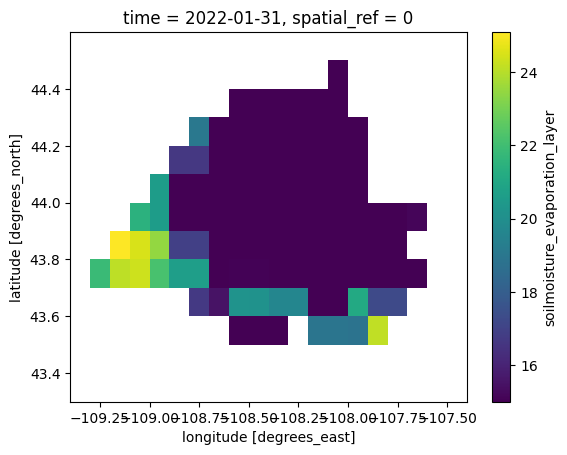

In [16]:




# soil_water_content_of_evaporation_layer_at_previous_step = xds_repr_match__soilmoisture
# infiltration = underground_runoff
# evaporation = E_a_pyet
# field_capacity_soil_water_content_of_evaporation_layer = 60
# permanent_wilting_point_soil_water_content_of_evaporation_layer = 15
# coverd = True
# infiltration_to_transpiration_layer = 2
# infiltration_to_transition_layer = 0

# temp_1 = (soil_water_content_of_evaporation_layer_at_previous_step.ssm.values) + (infiltration.underground_runoff.values) - (evaporation.Hargreaves.values) - (infiltration_to_transpiration_layer)

Ea_pyet = list(Ea_pyet.Hargreaves.values.flatten())
underground_runoff = list(ds_array_4.underground_runoff.values.flatten())
soil = list(ds_array_4.soilmoisture.values.flatten())

a = np.array([SoilContent.evaporation_layer(
    soil_water_content_of_evaporation_layer_at_previous_step = float(z),
    infiltration = float(j),
    evaporation = float(i),
    field_capacity_soil_water_content_of_evaporation_layer = 60,
    permanent_wilting_point_soil_water_content_of_evaporation_layer = 15,
    coverd = True,
    infiltration_to_transpiration_layer = 0
)
for i, j, z in zip(Ea_pyet, underground_runoff, soil)])

a = a.reshape(1,13,20)


ds_array = ds_array_4.assign(soilmoisture_evaporation_layer=(['time', 'y', 'x'], a))
ds_array.soilmoisture_evaporation_layer.plot()

In [ ]:
import rasterio
usa = gpd.read_file('/mnt/e/Term2/payan_name/import/sample/usa.shp')

with rasterio.open('path/to/raster.tif') as src:
    # Read the shapefile geometries
    geoms = [feature["geometry"] for feature in fiona.open(shapefile)]

    # Create a mask using the shapefile geometries and rasterio
    mask = geometry_mask(geoms, out_shape=src.shape, transform=src.transform, invert=True)

    # Apply the mask to the xarray dataset
    clipped_dataset = dataset.where(mask)


